In [103]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pdp
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

In [104]:
# # LOAD DATA
# INPUT_DIR  = '../../../input/lv3'
# LOG_NAME = '06_27_18_31_48'
# predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
# test = np.load(f"../log/{LOG_NAME}/pred_test.npy")
# json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))
# data = pd.read_csv(INPUT_DIR+f'/sales_lv3_CA_1.csv')
# data = data[data['index']==state]

In [105]:
# LOAD_DATA
INPUT_DIR  = '../../../input/lv3'
json_load = json.load(open(f'../log/{LOG_NAME}/params.json', 'r'))
LOG_NAME = '06_27_21_49_41'
predicted = np.load(f"../log/{LOG_NAME}/pred_valid.npy")
test = np.load(f"../log/{LOG_NAME}/pred_test.npy")

store_list = ['CA_1','CA_2','CA_3','CA_4','TX_1','TX_2','TX_3', 'WI_1','WI_2','WI_3']
input_array = np.zeros([len(store_list), 1934])
for i, store in enumerate(store_list):
    data = pd.read_csv(INPUT_DIR+f'/sales_lv3_{store}.csv')
    input_array[i] = data.drop(['1061','1426','1791'], axis=1).iloc[1,-1934:].values
    
use_days = json_load['use_days']
train_sales = input_array[:,  -1 * (28 + use_days) : -28*2]

In [106]:
# InverseするためのScalerを作る
mm= MinMaxScaler(feature_range=(0.05, 0.95))
mm.fit(train_sales.reshape(1,-1).T)

# 予測値をInverse Transform
predicted = mm.inverse_transform(predicted.T).T
test = mm.inverse_transform(test.T).T

In [107]:
y_true = input_array[:,-28:]
from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_true, predicted)))
RMSE = np.sqrt(mean_squared_error(y_true, predicted))

RMSE: 1621.806559956611


CA_1
CA_2
CA_3
CA_4
TX_1
TX_2
TX_3
WI_1
WI_2
WI_3


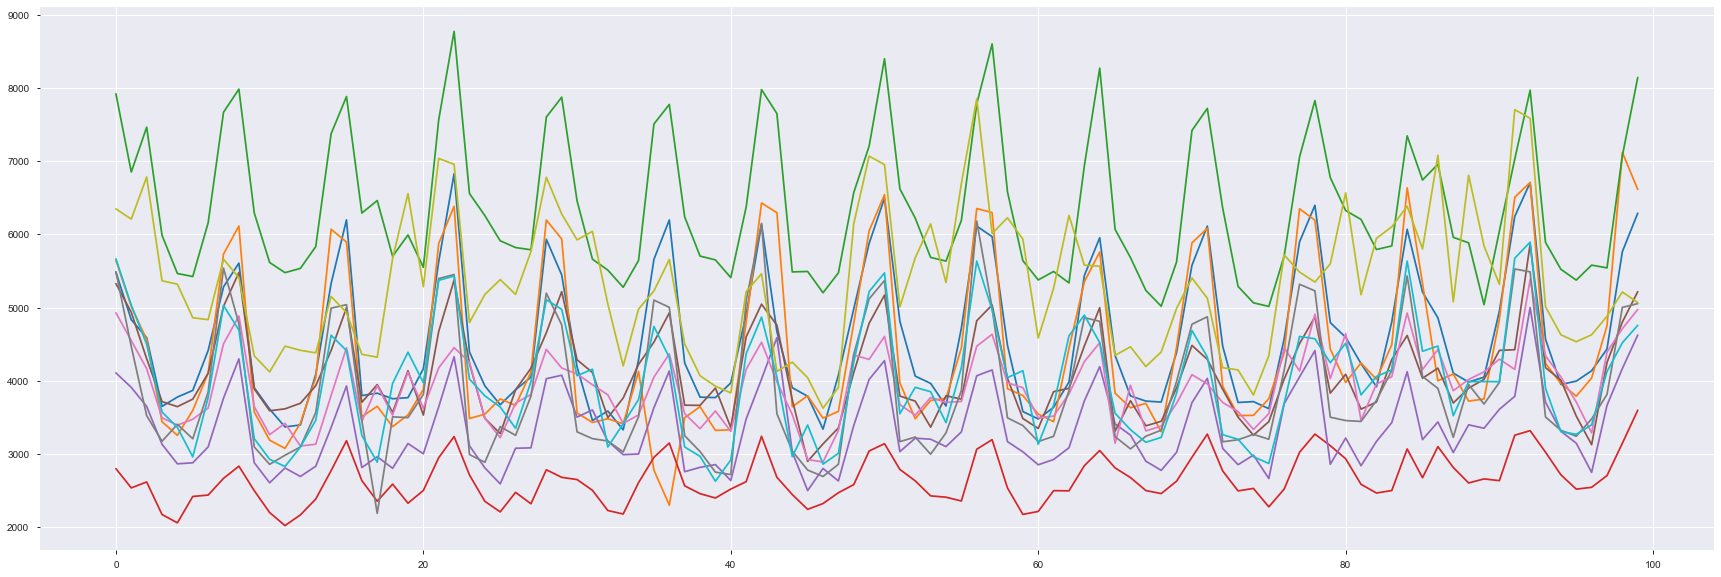

In [108]:
f, ax = plt.subplots(figsize=(30, 10))
for i, store in enumerate(store_list):
    print(store)
    days = 100
    plt.plot(input_array[i, -1*days:])
plt.show()

CA_1
CA_2
CA_3
CA_4
TX_1
TX_2
TX_3
WI_1
WI_2
WI_3


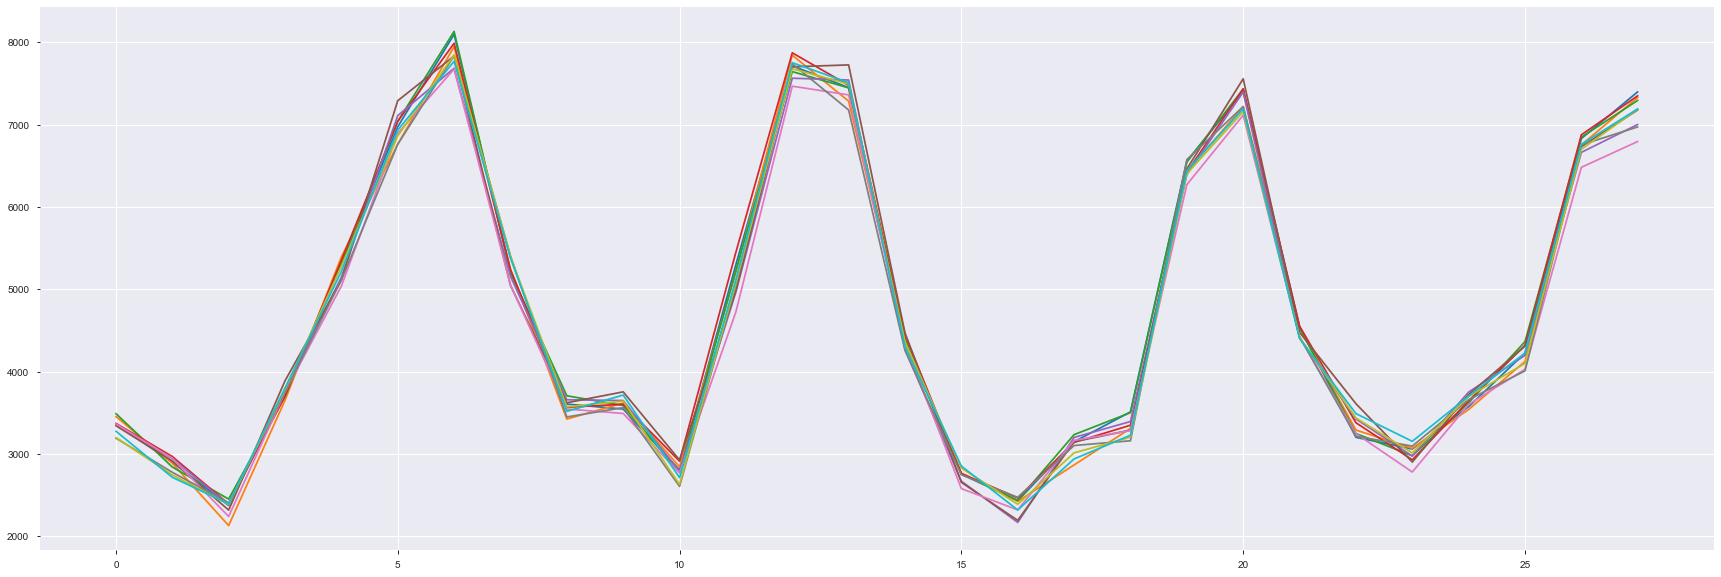

In [112]:
f, ax = plt.subplots(figsize=(30, 10))
for i, store in enumerate(store_list):
    print(store)
    days = 100
    plt.plot(test[i])
plt.show()

CA_1
CA_2
CA_3
CA_4
TX_1
TX_2
TX_3
WI_1
WI_2
WI_3


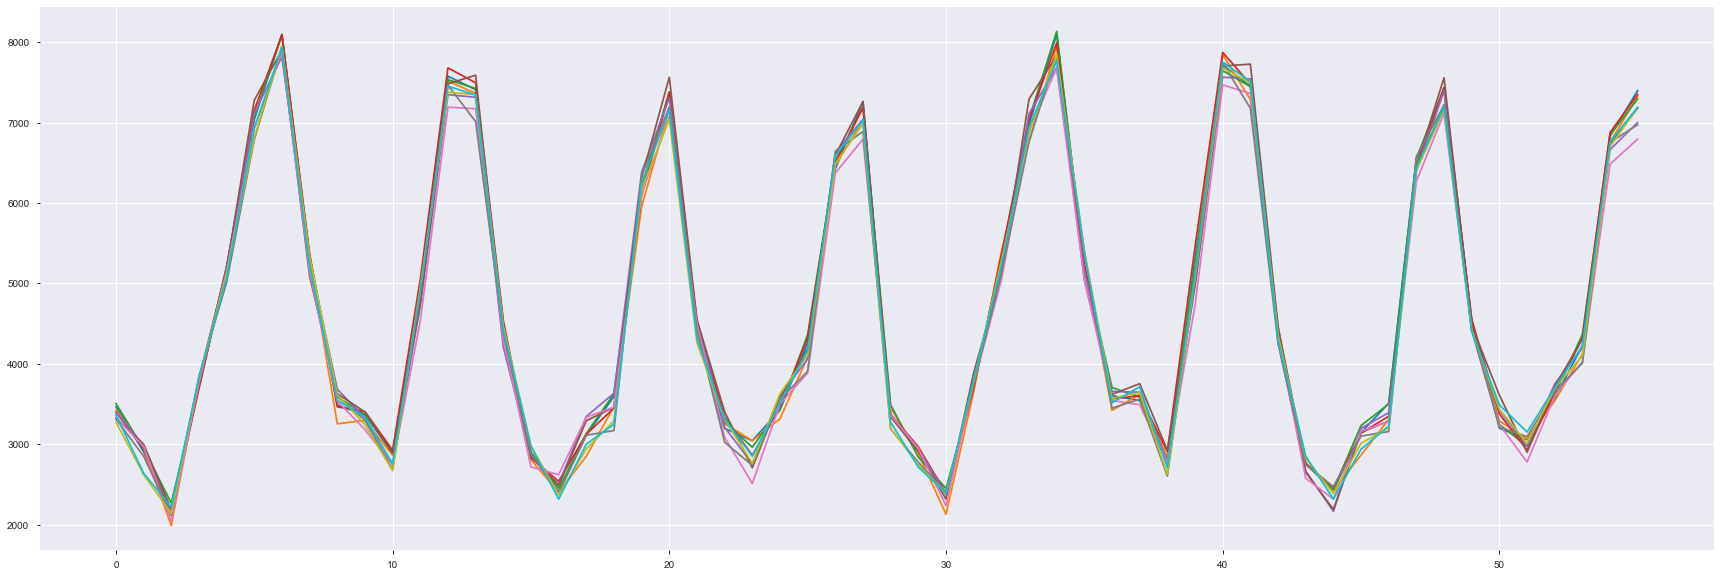

In [109]:
f, ax = plt.subplots(figsize=(30, 10))
for i, store in enumerate(store_list):
    print(store)
    days = 100
    plt.plot(np.concatenate([predicted[i],test[i]]))
plt.show()

CA_1


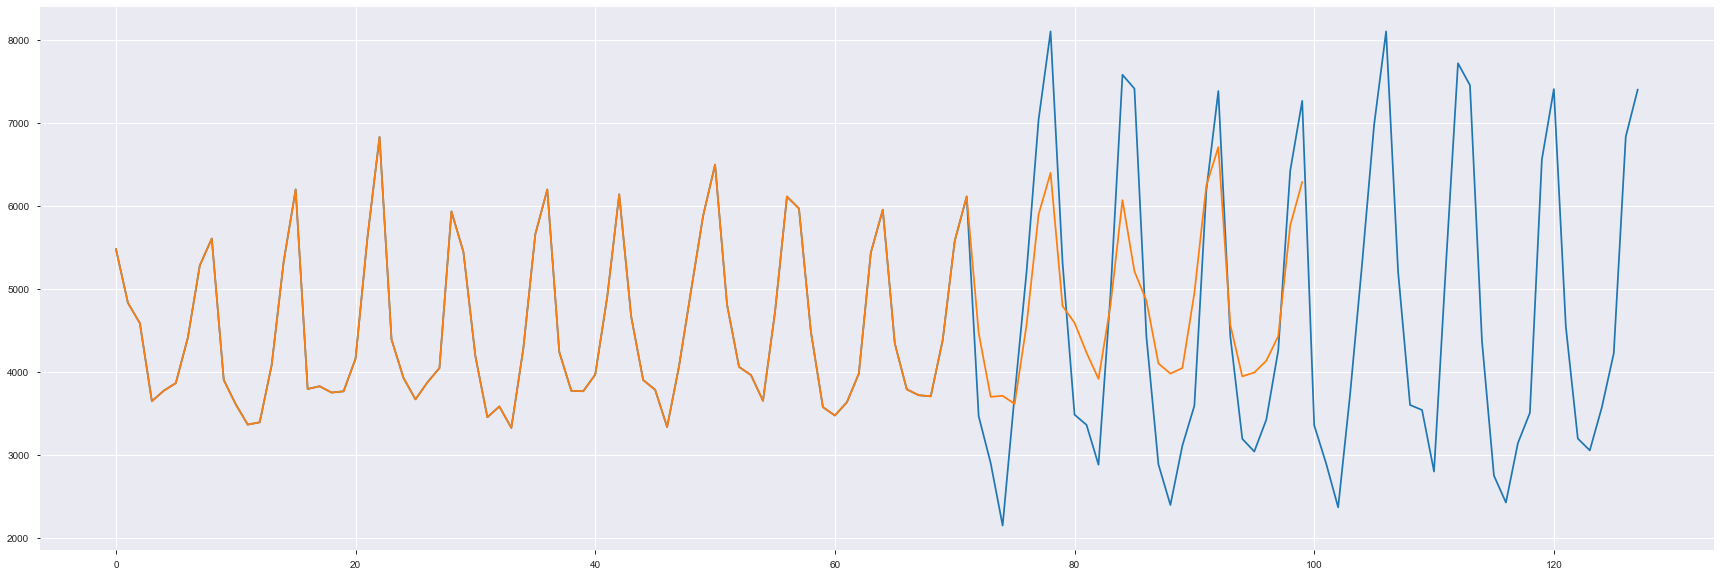

CA_2


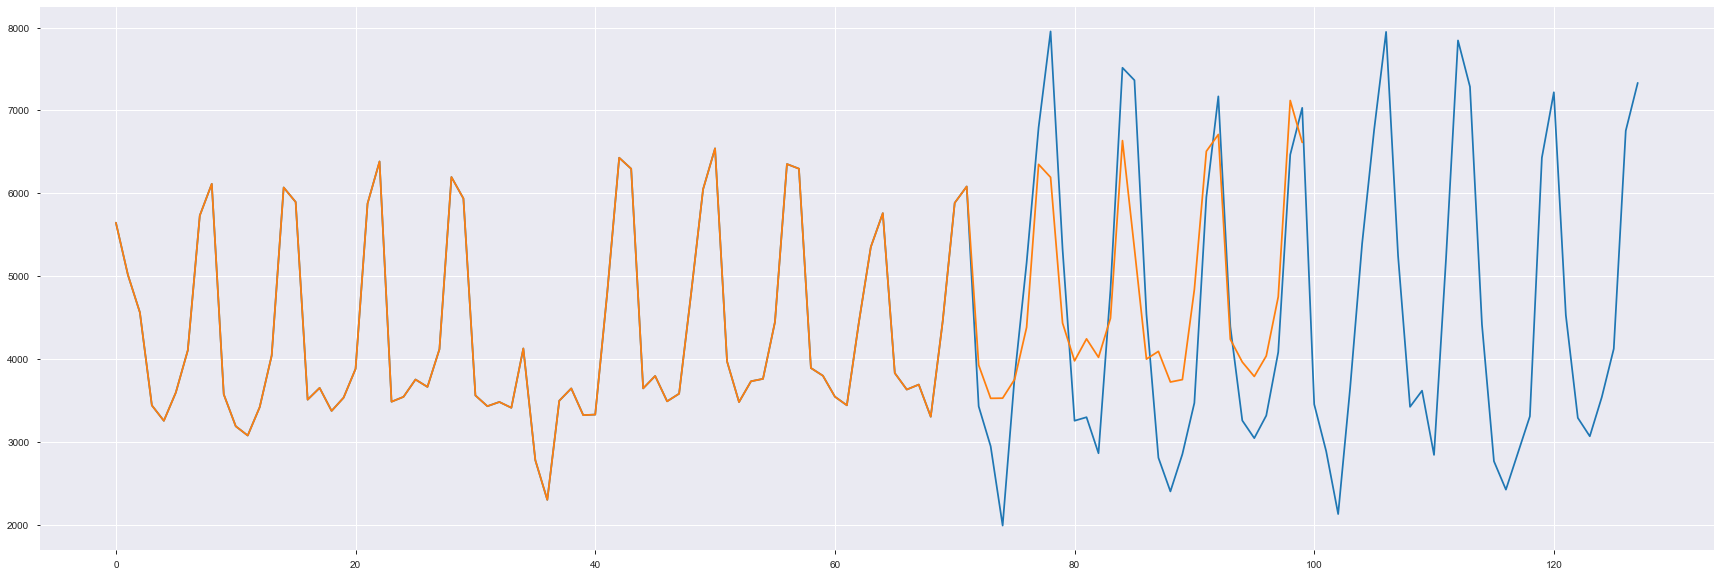

CA_3


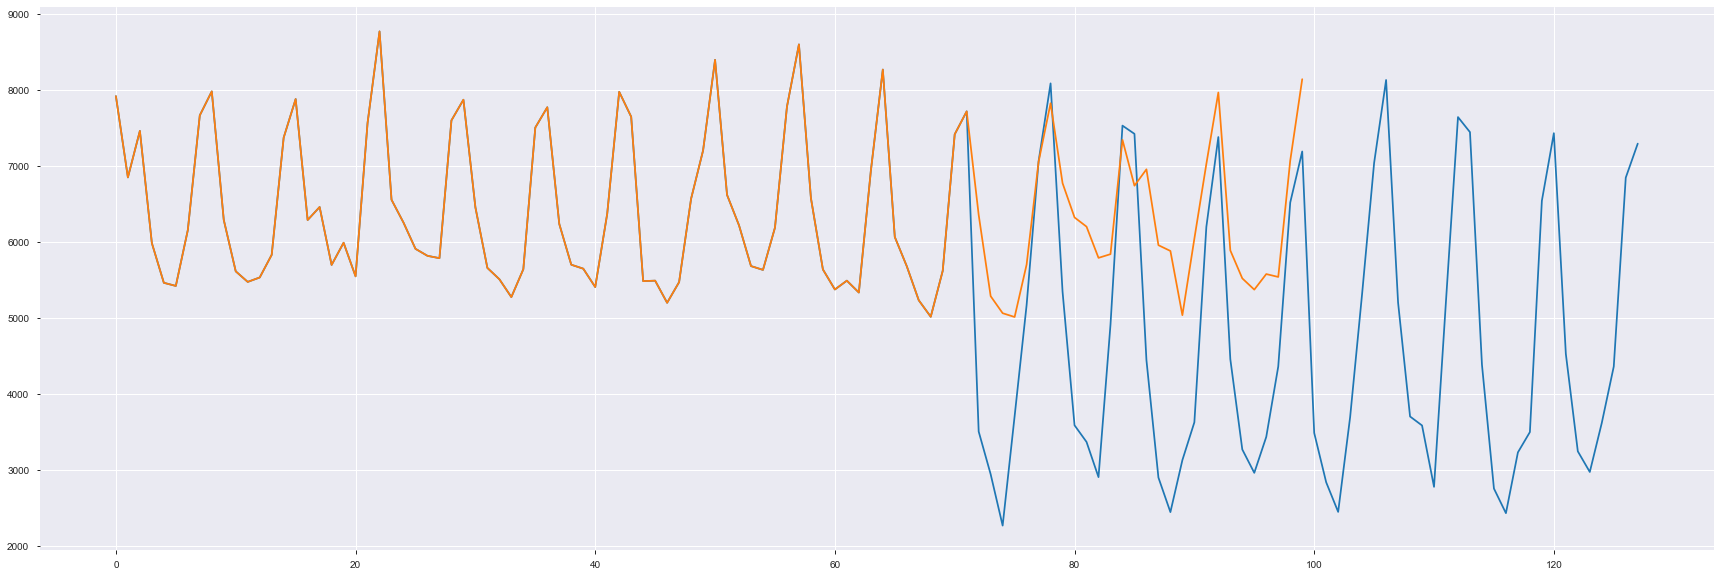

CA_4


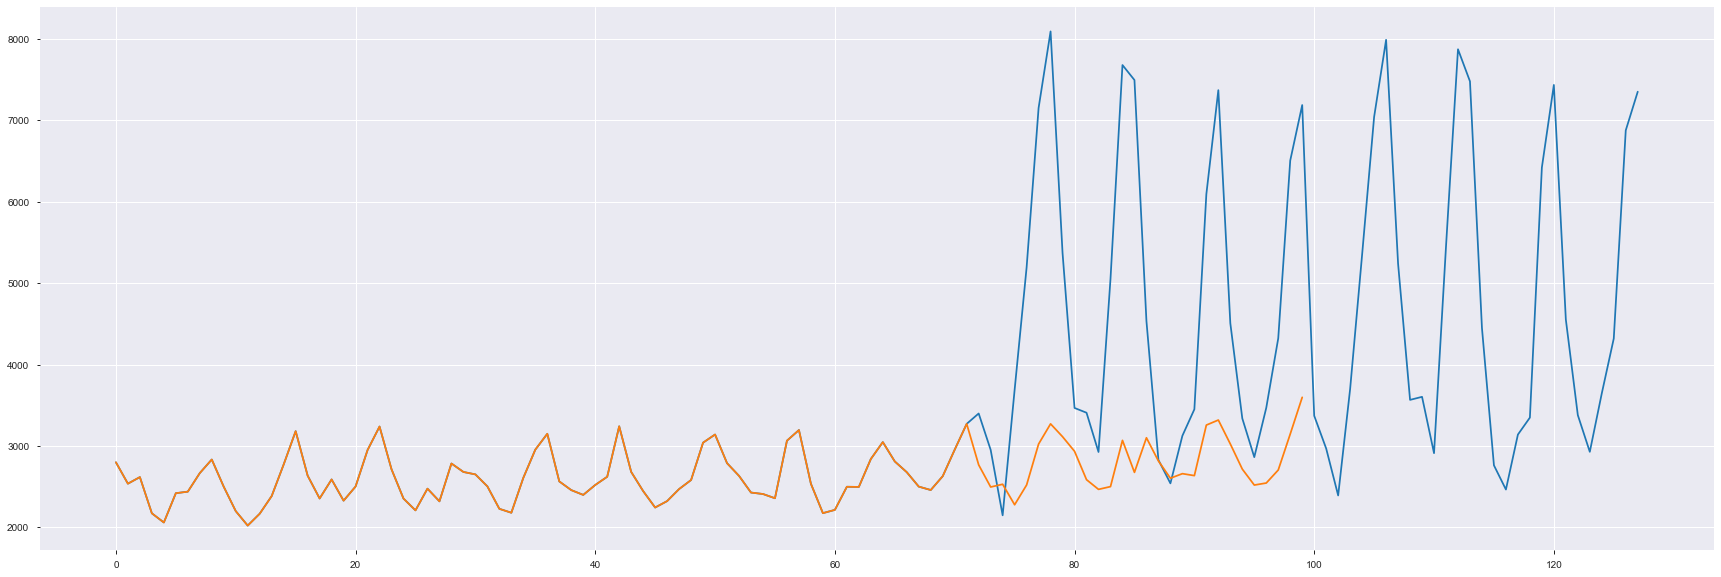

TX_1


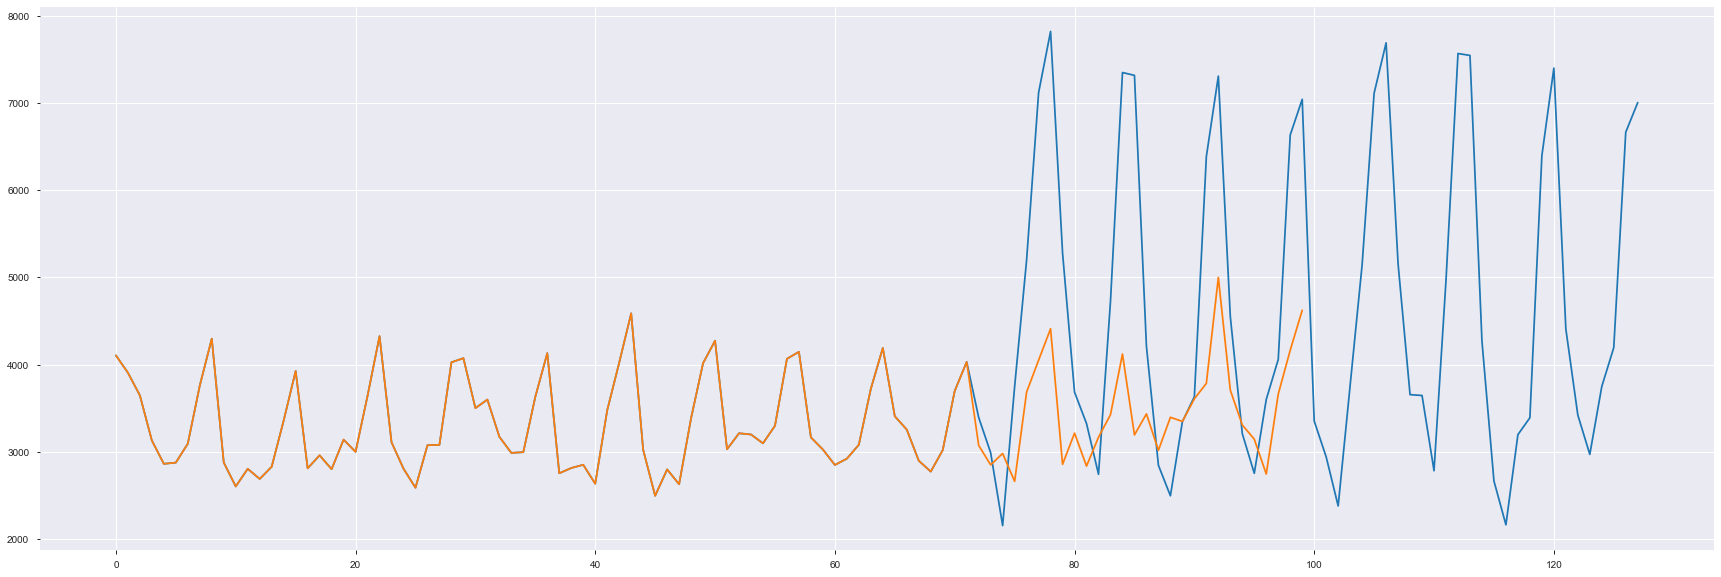

TX_2


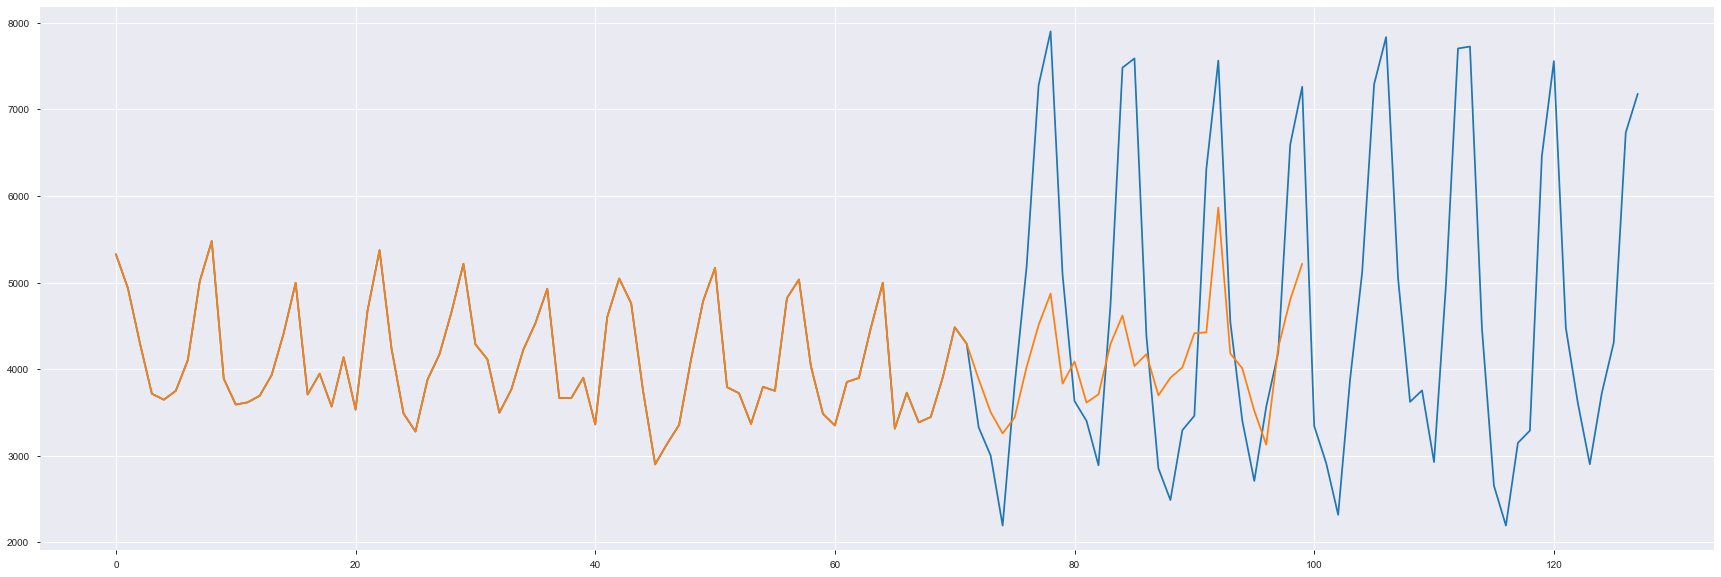

TX_3


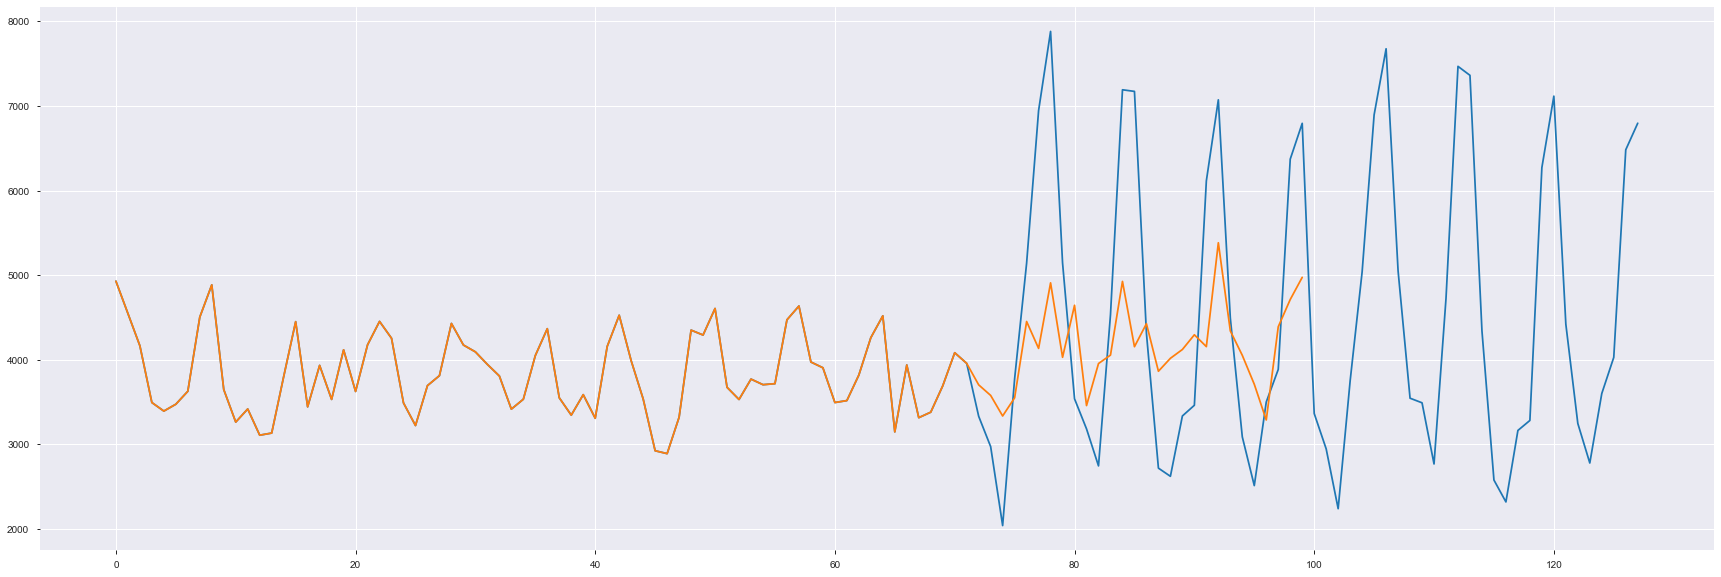

WI_1


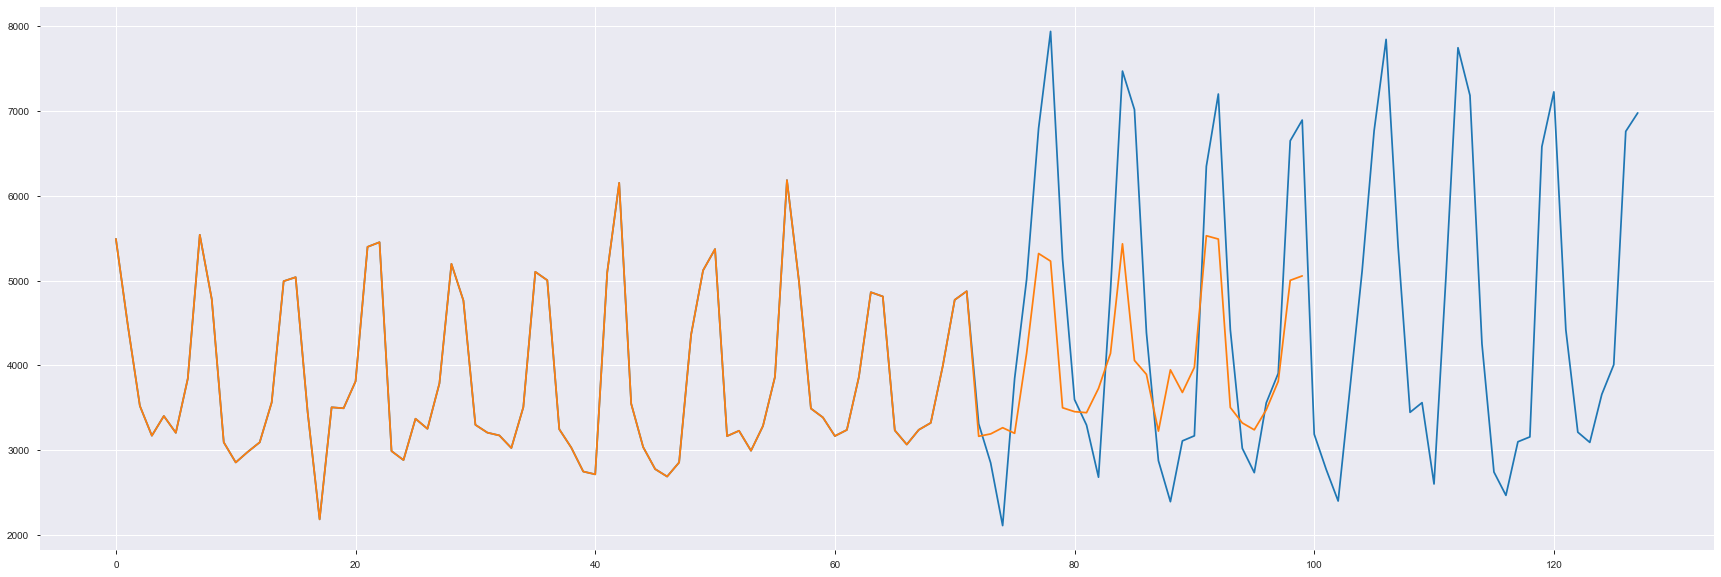

WI_2


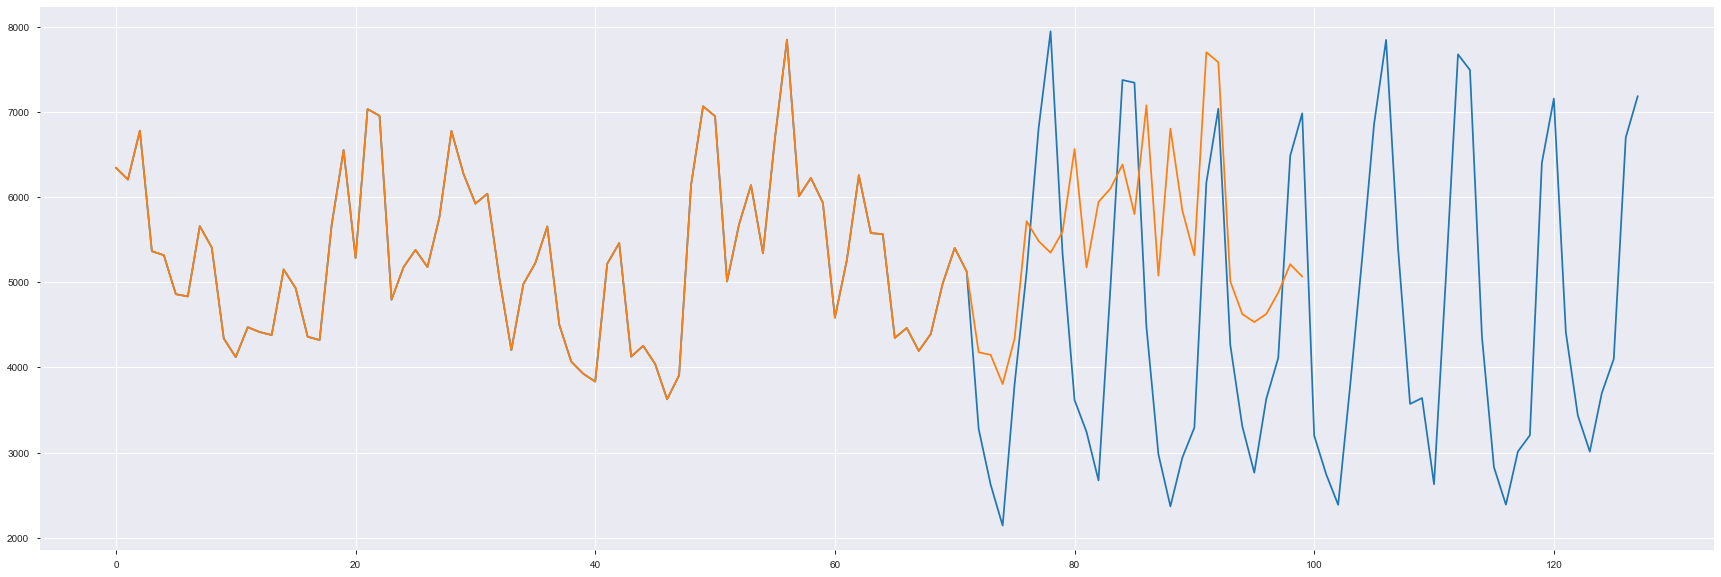

WI_3


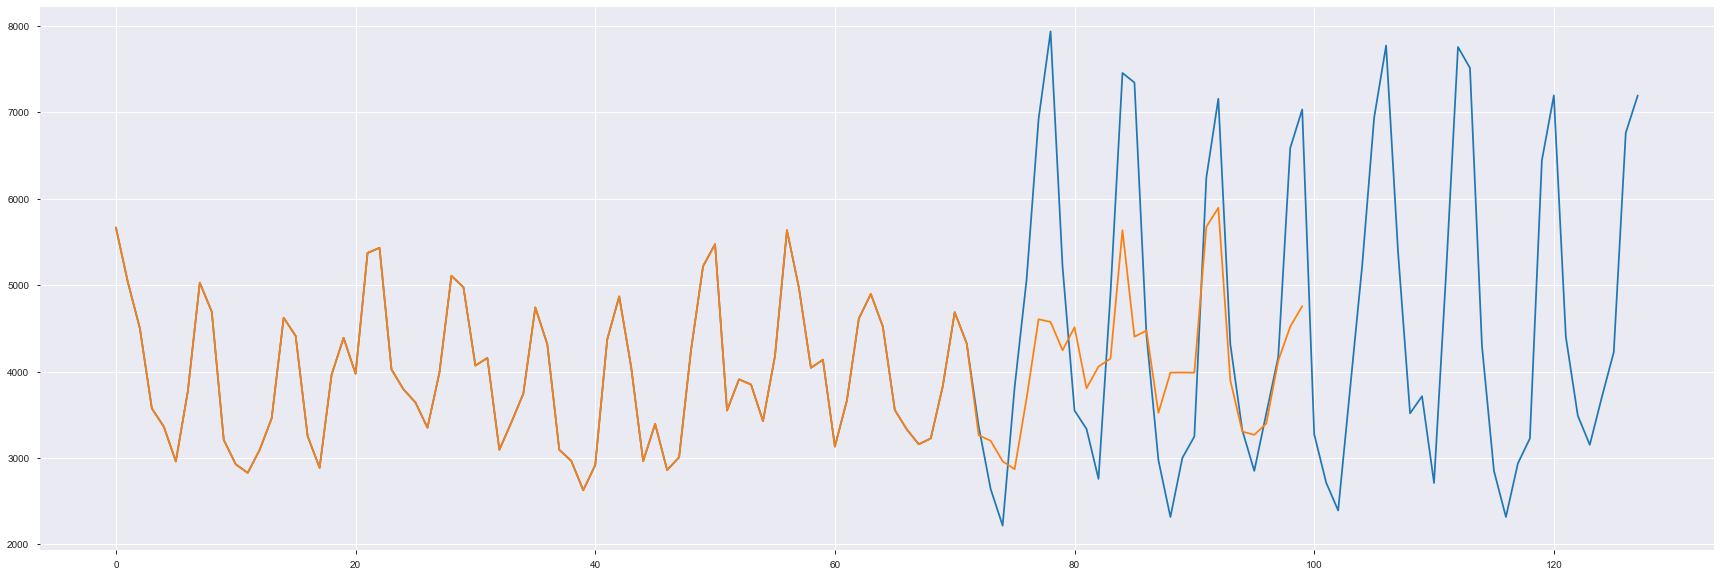

In [110]:
for i, store in enumerate(store_list):
    print(store)
    days = 100
    f, ax = plt.subplots(figsize=(30, 10))
    plt.plot(np.concatenate([input_array[i,-1*days:-28],predicted[i],test[i]]))
    plt.plot(input_array[i, -1*days:])
    plt.show()
    # sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
# plt.savefig(f"../log/{LOG_NAME}/pred_{RMSE}.png")
# print('lv2_state:',state)
#     print('RMSE:',RMSE)

lv2_state: TX
RMSE: 1308.6841741454837


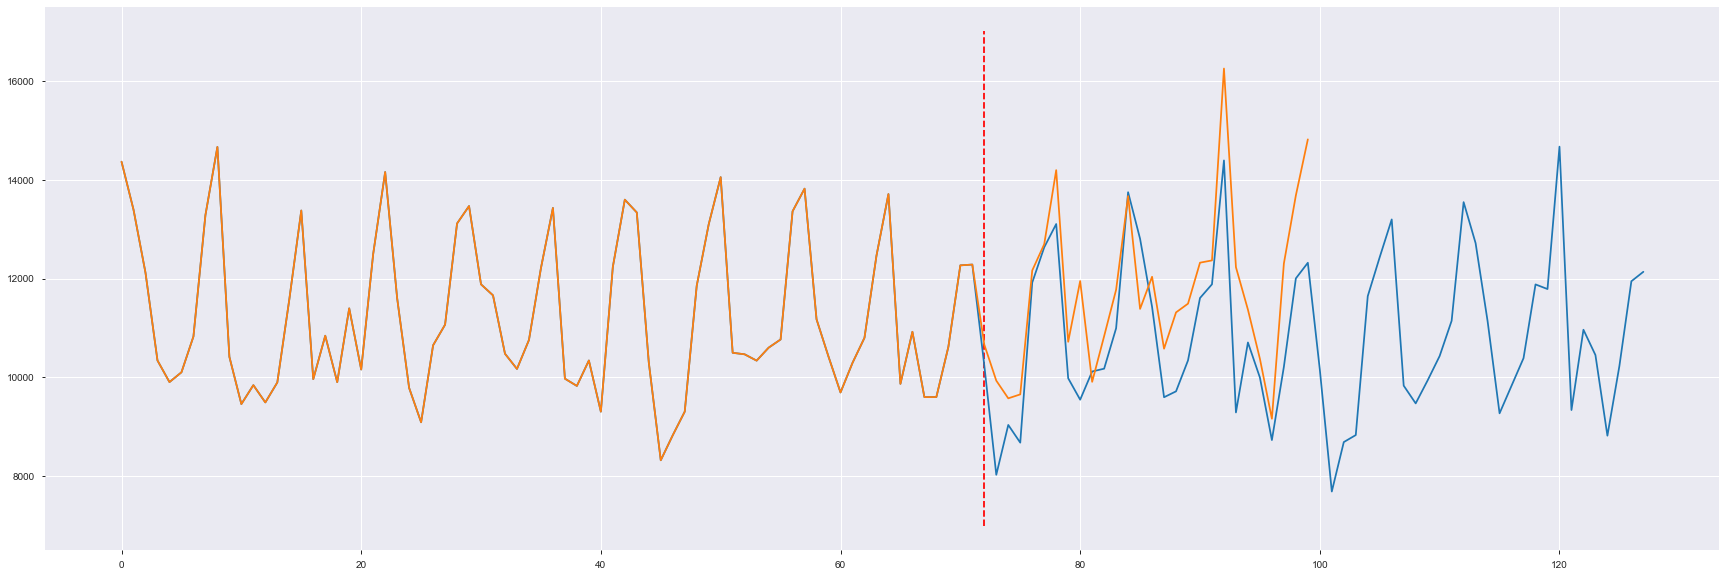

In [49]:
days = 100
f, ax = plt.subplots(figsize=(30, 10))
sells = np.array(data.iloc[:, -1 * days : -28]).sum(axis=0)
plt.plot(np.concatenate([sells.reshape(1,-1),predicted,test],axis=1).reshape(-1,))
plt.plot(np.array(data.iloc[:, -1 * days :]).sum(axis=0))
# sns.lineplot(predicted.iloc[i, :].index, predicted.iloc[i,:].values.astype("float32"))
if state == 'WI':
    plt.vlines(days-28, 8000, 20000, "red", linestyles='dashed')
if state == 'CA':
    plt.vlines(days-28, 10000, 30000, "red", linestyles='dashed')
if state == 'TX':
    plt.vlines(days-28, 7000, 17000, "red", linestyles='dashed')
plt.savefig(f"../log/{LOG_NAME}/pred_{RMSE}.png")
print('lv2_state:',state)
print('RMSE:',RMSE)

In [21]:
test.max()

8116.0366

In [22]:
test.min()

2949.8657

In [23]:
predicted.max()

7946.0483

In [24]:
predicted.min()

2916.2708

In [25]:
input_array.min()

131.0